<a href="https://colab.research.google.com/github/robd123/AML/blob/main/CV/digitsDeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from time import time

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from datetime import datetime

In [19]:
which = 3
out_file = 'numbers'
print( 'input data: ', out_file )
class_names = [ '0', '1', '2', '3', '4', '5', '6', '7', '8', '9' ]
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
channels = 1  #gray=1; rgb=3

input data:  numbers


**TODO #1 - Use a Randomized 80/20 Split for Training and Test Data**

In [20]:
X = np.concatenate((train_images, test_images), axis = 0)
Y = np.concatenate((train_labels, test_labels), axis = 0)

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

#Keep these since they are used later.  Reassign them to the new randomly split data
train_images = x_train
train_labels = y_train
test_images = x_test
test_labels = y_test

print( "# of training images and their size:", train_images.shape       )
print( "# of training labels and their size:", train_labels.shape, "\n" )

print( "# of testing images and their size:",  test_images.shape        )
print( "# of testing labels and their size:",  test_labels.shape        )

(70000, 28, 28)
(70000,)
# of training images and their size: (56000, 28, 28)
# of training labels and their size: (56000,) 

# of testing images and their size: (14000, 28, 28)
# of testing labels and their size: (14000,)


In [21]:
img_rows    = x_train.shape[1]
img_cols    = x_train.shape[2]
input_shape = (img_rows, img_cols, channels)    #channels = 1 for gray (3 for color/rgb)

t1 = np.min( x_train )
t2 = np.min( x_test )
mn = np.min( [t1, t2] )

t1 = np.max( x_train )
t2 = np.max( x_test )
mx = np.min( [t1, t2] )

print( 'rows =', img_rows )
print( 'cols =', img_cols )
print( 'channels =', channels, '\n' )
print( 'min =', mn )
print( 'max =', mx )

rows = 28
cols = 28
channels = 1 

min = 0
max = 255


In [22]:
print( '# of training images: ', len(x_train) )
print( 'shape before: ', x_train.shape )

#prep training images
x_train = x_train.reshape( x_train.shape[0], img_rows, img_cols, channels )
x_train = x_train.astype( 'float32' )

assert mx == 255, "check range of data values"
x_train /= 255.0  #normalize

print( 'shape after: ', x_train.shape )

"""### prep testing"""

print( '# of testing images: ', len(x_test) )
print( 'shape before: ', x_test.shape )


# of training images:  56000
shape before:  (56000, 28, 28)
shape after:  (56000, 28, 28, 1)
# of testing images:  14000
shape before:  (14000, 28, 28)


In [23]:
#prep testing images
x_test = x_test.reshape( x_test.shape[0], img_rows, img_cols, channels )
x_test = x_test.astype( 'float32' )
assert mx == 255, "check range of data values"
x_test /= 255.0  #normalize

**Create Convolutional Model**

In [24]:
model = keras.models.Sequential([
                                      keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=input_shape),
                                      keras.layers.MaxPooling2D(2),
                                      keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
                                      keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
                                      keras.layers.MaxPooling2D(2),
                                      keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
                                      keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
                                      keras.layers.MaxPooling2D(2),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(128, activation='relu'),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Dense(64, activation='relu'),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Dense( len(class_names), activation='softmax' )
])
model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

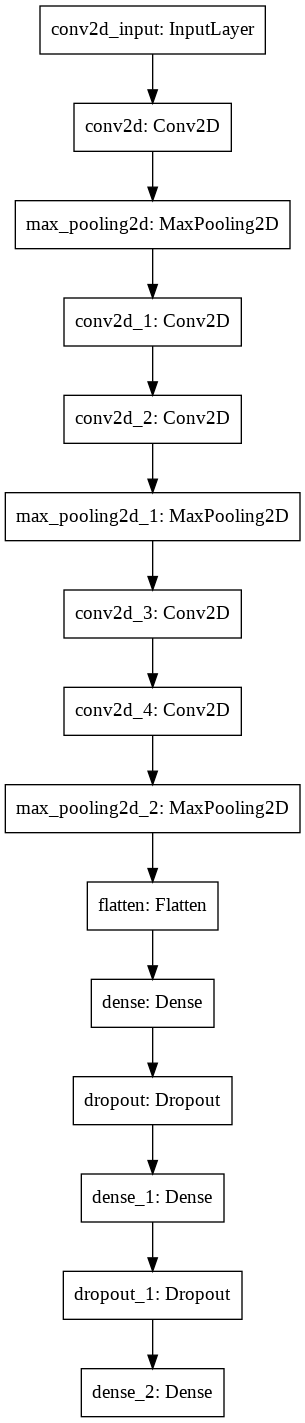

In [7]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96 )


In [9]:
# Define the Keras TensorBoard callback.
logdir = "logs/fit/" + datetime.now().strftime( "%Y%m%d-%H%M%S" )
tensorboard_callback = keras.callbacks.TensorBoard( log_dir=logdir )

**TODO #2 - Train Model, Use Test Data for Validation**

---
Validation data does not affect the training of the model, it just provides metrics, so the test set can be used for validation.


In [25]:
print( "training ... \n" )
ep = 100
start = time()
h = model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback],  validation_data=(x_test, y_test))
elapsed_training_time = time() - start

training ... 

Epoch 1/100
1750/1750 [==============================] - 46s 7ms/step - loss: 0.7846 - accuracy: 0.7345 - val_loss: 0.1042 - val_accuracy: 0.9763
Epoch 2/100
1750/1750 [==============================] - 12s 7ms/step - loss: 0.1206 - accuracy: 0.9705 - val_loss: 0.0658 - val_accuracy: 0.9845
Epoch 3/100
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0859 - accuracy: 0.9794 - val_loss: 0.0674 - val_accuracy: 0.9861
Epoch 4/100
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0660 - accuracy: 0.9852 - val_loss: 0.0507 - val_accuracy: 0.9891
Epoch 5/100
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0509 - accuracy: 0.9878 - val_loss: 0.0718 - val_accuracy: 0.9866
Epoch 6/100
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0522 - accuracy: 0.9882 - val_loss: 0.0731 - val_accuracy: 0.9881
Epoch 7/100
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0473 - accuracy: 0.9896 - val

In [ ]:
model.save('digits_conv.h5')

In [26]:
print(elapsed_training_time)

1220.936205625534


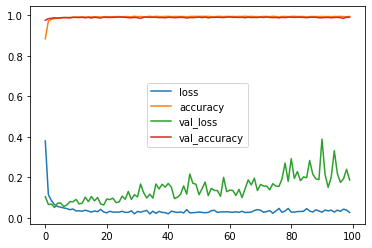

In [27]:
pd.DataFrame(model.history.history).plot()

**Create Noisy Test Data**

In [28]:
np.random.seed(17)

zeroes = np.zeros((len(x_test), img_rows, img_cols, 1))
ones = zeroes + 1

noisy_test_sets = list()
noisy_display_sets = list()

#Base noiseless data
noisy_test_sets.append(x_test)
noisy_x_test = x_test

for i in range(0, 20):

  noise = np.random.normal(0, .1, x_test.shape)
  noisy_x_test = noisy_x_test + noise
  noisy_x_test = np.minimum(noisy_x_test, ones)
  noisy_x_test = np.maximum(noisy_x_test, zeroes)

  noisy_test_sets.append(noisy_x_test)
  # Reshape and multiply by 255 to get images for display
  noisy_display_sets.append(noisy_x_test.reshape(len(x_test), img_rows, img_cols) * 255)

In [30]:
noise_accuracy_scores = list()
noisy_predictions = list()
noise_classification_data = list()

for test_set in noisy_test_sets:
  pred = np.argmax(model.predict(test_set), axis=-1)
  noise_accuracy_scores.append(accuracy_score(y_test, pred))
  noise_classification_data.append(classification_report(y_test, pred))
  noisy_predictions.append(pred)

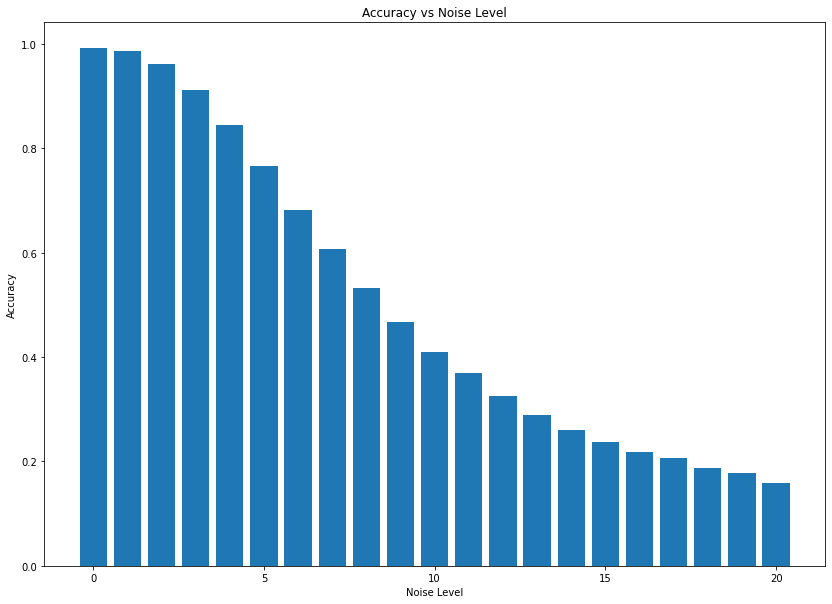

In [31]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 21), noise_accuracy_scores )
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()